In [1]:
import nn
import importlib
importlib.reload(nn)
from nn import ANN
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as wgs

def apply_random_weights(model, seed, max_abs_value):
    np.random.seed(seed)
    for layer in range(1, len(units_per_layer)):
        layer_size = units_per_layer[layer]
        prev_layer_size = units_per_layer[layer-1]
        for i in range(layer_size):
            rand_array = (np.random.rand(prev_layer_size) - 0.5) * 2 * max_abs_value # values between [-1,1] * max_abs_value
            b = (np.random.rand() - 0.5) * 2 * max_abs_value # values between [-1,1] * max_abs_value
            model.set_weights(layer-1, i, rand_array, b)
            
def get_model():
    assert(nn_model != None)
    return nn_model

def on_value_change(change):
    is_b = change.owner.description == 'b' # description contains either 'w' or 'b'
    changed_layer,changed_unit = change.owner.description_tooltip.split(",")
    changed_layer = int(changed_layer)
    changed_unit = int(changed_unit)
    model = get_model()
    # change the value of model's weights according to the respective slider's new value
    if is_b:
        model.Bs[changed_layer][changed_unit] = change['new']
    else:
        changed_weight = int(change.owner.description[1:])-1 # skip 'w'
        model.Ws[changed_layer][changed_unit][changed_weight] = change['new']
    # predict and redraw the figure
    redraw_figure(model.predict(X), ax)
    
def create_tab_layout(units_per_layer, model, slider_max_abs_value):
    # set layout details
    real_time_update = False

    # create tab
    tab = wgs.Tab()
    tab_children = []
    fslider_style = {'description_width': 'initial'}
    fslider_layout = wgs.Layout(width='200px')
    vbox_layout = wgs.Layout(min_width= '210px')
    slider_step = slider_max_abs_value * 0.01
    min_height,max_height = -slider_max_abs_value,slider_max_abs_value

    # set tab children
    num_layers = len(units_per_layer) - 1
    for layer_index in range(num_layers):
        num_units = units_per_layer[layer_index+1]
        num_units_prev = units_per_layer[layer_index]
        box = wgs.HBox(
            [wgs.VBox(
                [wgs.Label(value="unit"+str(unit_index+1))] +
                [wgs.FloatSlider(min=min_height,max=max_height,step=slider_step,
                                 value=model.Ws[layer_index][unit_index][w_index-1],
                                 style=fslider_style,layout=fslider_layout,
                                 continuous_update=real_time_update,
                                 description_tooltip=str(layer_index)+","+str(unit_index),
                                 description="w" + str(w_index)) for w_index in range(1,num_units_prev+1)] + 
                [wgs.FloatSlider(min=min_height,max=max_height,step=slider_step,
                                 value=model.Bs[layer_index][unit_index][0],
                                 style=fslider_style,layout=fslider_layout,
                                 continuous_update=real_time_update,
                                 description_tooltip=str(layer_index)+","+str(unit_index),
                                 description="b")],
                layout=vbox_layout) 
             for unit_index in range(num_units)])
        tab_children.append(box)
        
    # set tab titles
    tab.children = tab_children
    for i in range(0,num_layers):
        tab.set_title(i, "layer"+str(i+1))

    # set sliders events
    for hbox_elem in tab.children:
        for vbox_elem in hbox_elem.children:
            for slidr in vbox_elem.children[1:]: # skip Label
                slidr.observe(on_value_change, names='value')
    return tab

def redraw_figure(output_data, ax):
    rounded_data = np.round(output_data * 255).astype(int)
    img_data = np.reshape(rounded_data.T,(num_pixels, num_pixels, 3))
    #img_data = np.stack((data_reshaped,data_reshaped,data_reshaped), axis=2)
    ax.cla() # clear the axis - avoids the slowing down
    ax.axis('off')
    ax.imshow(img_data)

nn_model = None
# set nn inputs
num_inputs = 2 # number of inputs
num_pixels = 400
X = np.zeros(shape=(num_inputs, num_pixels * num_pixels), dtype=float)
for i in range(num_pixels):
    X[0,i*num_pixels:(i+1)*num_pixels] = np.arange(-1, 1, 2/num_pixels)
    X[1,i*num_pixels:(i+1)*num_pixels] = np.full((1,num_pixels), i*2/num_pixels - 1)

<IPython.core.display.Javascript object>


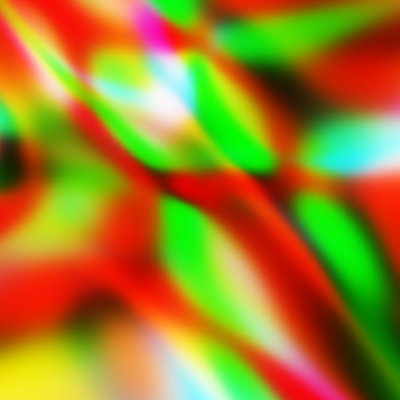

In [2]:
### CHANGE HERE ###
hidden_layers = [8,8] # set the number of units for each hidden layer
###################

num_outputs = 3 # number of outputs
slider_max_abs_value = 3
# create model
units_per_layer = [num_inputs] + hidden_layers + [num_outputs] # set nn layers
# activations: sigmoid, tanh, relu, relu_limited, mexican_hat
### CHANGE HERE ###
hidden_layers_activation = ANN.Activation_type.mexican_hat # set nn hidden layers activation
###################
nn_model = ANN(units_per_layer, hidden_layers_activation) # initialize nn model

# model prediction with random weights
### CHANGE HERE ###
rand_seed = 7
###################
apply_random_weights(nn_model, rand_seed, slider_max_abs_value)
model_result = nn_model.predict(X)

# create and display layout
tabs = create_tab_layout(units_per_layer, nn_model, slider_max_abs_value)
display(tabs)

# set figure
plt.ion() # enable interactive mode
fig, ax = plt.subplots(figsize=(5, 5))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, hspace=0.0, wspace=0.0)
redraw_figure(model_result, ax)